<a href="https://colab.research.google.com/github/PedroMesquitaIsidoro/ArvoreDeDecisao-IA/blob/main/Questao1/Analise_de_risco_C43.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
#######   Arvore de decisao C4.5
import pandas as pd # para trabalhar com a planilha
import numpy as np # para calculos 
base_risco_credito = pd.read_csv('RiscoDeCredito.csv')
base_risco_credito

,Historia de Credito,Divida,Garantia,Renda,Risco
0,Ruim,Alta,Nenhuma,0_15,Alto
1,Desconhecida,Alta,Nenhuma,15_35,Alto
2,Desconhecida,Baixa,Nenhuma,15_35,Moderado
3,Desconhecida,Baixa,Nenhuma,acima_35,Alto
4,Desconhecida,Baixa,Nenhuma,acima_35,Baixo
5,Desconhecida,Baixa,Adequada,acima_35,Baixo
6,Ruim,Baixa,Nenhuma,0_15,Alto
7,Ruim,Baixa,Adequada,acima_35,Moderado
8,Boa,Baixa,Nenhuma,acima_35,Baixo
9,Boa,Alta,Adequada,acima_35,Baixo


In [3]:
#Pre-processamento dos dados
x_risco_credito = base_risco_credito.iloc[:, 0:4].values
x_risco_credito #mostra todos os atributos com excessao da clase

array([['Ruim', 'Alta', 'Nenhuma', '0_15'],
       ['Desconhecida', 'Alta', 'Nenhuma', '15_35'],
       ['Desconhecida', 'Baixa', 'Nenhuma', '15_35'],
       ['Desconhecida', 'Baixa', 'Nenhuma', 'acima_35'],
       ['Desconhecida', 'Baixa', 'Nenhuma', 'acima_35'],
       ['Desconhecida', 'Baixa', 'Adequada', 'acima_35'],
       ['Ruim', 'Baixa', 'Nenhuma', '0_15'],
       ['Ruim', 'Baixa', 'Adequada', 'acima_35'],
       ['Boa', 'Baixa', 'Nenhuma', 'acima_35'],
       ['Boa', 'Alta', 'Adequada', 'acima_35'],
       ['Boa', 'Alta', 'Nenhuma', '0_15'],
       ['Boa', 'Alta', 'Nenhuma', '15_35'],
       ['Boa', 'Alta', 'Nenhuma', 'acima_35'],
       ['Ruim', 'Alta', 'Nenhuma', '15_35']], dtype=object)

In [4]:
#Pre-processamento dos dados
y_risco_credito = base_risco_credito.iloc[:, 4].values
y_risco_credito #mostrar classe

array(['Alto', 'Alto', 'Moderado', 'Alto', 'Baixo', 'Baixo', 'Alto',
       'Moderado', 'Baixo', 'Baixo', 'Alto', 'Moderado', 'Baixo', 'Alto'],
      dtype=object)

In [5]:
#Pre-processamento dos dados
from sklearn.preprocessing import LabelEncoder
label_encoder_historia = LabelEncoder()
label_encoder_divida = LabelEncoder()
label_encoder_garantia = LabelEncoder()
label_encoder_renda = LabelEncoder()

In [6]:
#Pre-processamento dos dados
x_risco_credito[:, 0] = label_encoder_historia.fit_transform(x_risco_credito[:, 0])
x_risco_credito[:, 1] = label_encoder_divida.fit_transform(x_risco_credito[:, 1])
x_risco_credito[:, 2] = label_encoder_garantia.fit_transform(x_risco_credito[:, 2])
x_risco_credito[:, 3] = label_encoder_renda.fit_transform(x_risco_credito[:, 3])

In [7]:
#Pre-processamento dos dados
x_risco_credito

array([[2, 0, 1, 0],
       [1, 0, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 2],
       [1, 1, 1, 2],
       [1, 1, 0, 2],
       [2, 1, 1, 0],
       [2, 1, 0, 2],
       [0, 1, 1, 2],
       [0, 0, 0, 2],
       [0, 0, 1, 0],
       [0, 0, 1, 1],
       [0, 0, 1, 2],
       [2, 0, 1, 1]], dtype=object)

In [8]:
# salvando os dados pre-processados
import pickle
with open('risco_credito.pkl', 'wb') as f:
  pickle.dump([x_risco_credito, y_risco_credito], f) 

In [9]:
from sklearn.tree import DecisionTreeClassifier

In [10]:
import pickle
with open('risco_credito.pkl', 'rb') as f:  # abrindo o arquivo já pre-processado
  x_risco_credito, y_risco_credito = pickle.load(f)



In [11]:
x_risco_credito

array([[2, 0, 1, 0],
       [1, 0, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 2],
       [1, 1, 1, 2],
       [1, 1, 0, 2],
       [2, 1, 1, 0],
       [2, 1, 0, 2],
       [0, 1, 1, 2],
       [0, 0, 0, 2],
       [0, 0, 1, 0],
       [0, 0, 1, 1],
       [0, 0, 1, 2],
       [2, 0, 1, 1]], dtype=object)

In [12]:
y_risco_credito

array(['Alto', 'Alto', 'Moderado', 'Alto', 'Baixo', 'Baixo', 'Alto',
       'Moderado', 'Baixo', 'Baixo', 'Alto', 'Moderado', 'Baixo', 'Alto'],
      dtype=object)

In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_risco_credito, y_risco_credito, test_size = 0.25, random_state = 0)

In [18]:
x_risco_credito

array([[2, 0, 1, 0],
       [1, 0, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 2],
       [1, 1, 1, 2],
       [1, 1, 0, 2],
       [2, 1, 1, 0],
       [2, 1, 0, 2],
       [0, 1, 1, 2],
       [0, 0, 0, 2],
       [0, 0, 1, 0],
       [0, 0, 1, 1],
       [0, 0, 1, 2],
       [2, 0, 1, 1]], dtype=object)

In [19]:
x_train

array([[1, 1, 1, 1],
       [2, 0, 1, 1],
       [0, 0, 0, 2],
       [1, 0, 1, 1],
       [2, 1, 0, 2],
       [0, 0, 1, 0],
       [1, 1, 1, 2],
       [2, 0, 1, 0],
       [1, 1, 0, 2],
       [0, 0, 1, 2]], dtype=object)

In [20]:
from sklearn import tree
model = tree.DecisionTreeClassifier(random_state=0, max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0, max_leaf_nodes=None, min_impurity_decrease=0)

In [21]:
clf = model.fit(x_train, y_train)

[Text(0.5, 0.9, 'renda <= 1.5\ngini = 0.62\nsamples = 10\nvalue = [5, 3, 2]\nclass = Alto'),
 Text(0.25, 0.7, 'divida <= 0.5\ngini = 0.32\nsamples = 5\nvalue = [4, 0, 1]\nclass = Alto'),
 Text(0.125, 0.5, 'gini = 0.0\nsamples = 4\nvalue = [4, 0, 0]\nclass = Alto'),
 Text(0.375, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = Moderado'),
 Text(0.75, 0.7, 'historia de credito <= 1.5\ngini = 0.56\nsamples = 5\nvalue = [1, 3, 1]\nclass = Baixo'),
 Text(0.625, 0.5, 'garantias <= 0.5\ngini = 0.375\nsamples = 4\nvalue = [1, 3, 0]\nclass = Baixo'),
 Text(0.5, 0.3, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0]\nclass = Baixo'),
 Text(0.75, 0.3, 'historia de credito <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1, 0]\nclass = Alto'),
 Text(0.625, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]\nclass = Baixo'),
 Text(0.875, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0]\nclass = Alto'),
 Text(0.875, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = Moderado')]

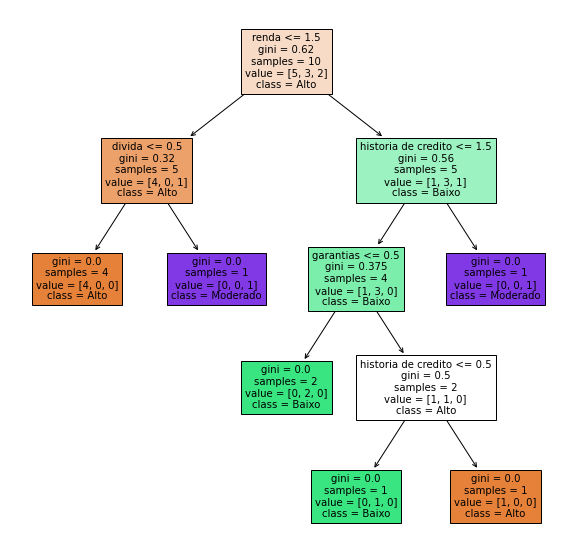

In [30]:
from sklearn import tree
import matplotlib.pyplot as plt

previsores = ['historia de credito', 'divida', 'garantias', 'renda']
figura, eixos = plt.subplots(nrows = 1, ncols =1, figsize=(10,10))
tree.plot_tree(clf, feature_names=previsores, class_names = clf.classes_, filled= True)

In [34]:
y_pred = clf.predict(x_test)


In [37]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
# validação
akurasi = classification_report(y_test, y_pred)
print('Akurasi:', akurasi)

Akurasi:               precision    recall  f1-score   support

        Alto       0.00      0.00      0.00         1
       Baixo       1.00      0.50      0.67         2
    Moderado       0.00      0.00      0.00         1

    accuracy                           0.25         4
   macro avg       0.33      0.17      0.22         4
weighted avg       0.50      0.25      0.33         4



In [38]:
akurasi = accuracy_score(y_test, y_pred)
print('%d porcento' %(akurasi*100))

25 porcento


In [39]:
#espaço para realizar testes:
#Entradas em numeros para as instancias:
#Pra Historia de credito
# 0 ->  Boa
# 1 ->  Desconhecida
# 2 ->  Ruim


#Pra Divida
# 0 ->  Alta
# 1 ->  Baixa

#Pra Garantia
# 0 ->  Adequada
# 1 ->  Nenhuma


#Pra Renda
# 0 ->  entre 0 e 15
# 1 ->  entre 15 e 35
# 2 -> acima de 35



#exemplo para [boa, baixa, nenhuma, entre 0 e 15]
previsores= clf.predict([[0,1,1, 0]])
previsores

array(['Moderado'], dtype=object)